In [33]:
import requests as r
import pandas as pd
%matplotlib notebook
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

import catboost as cgb
import xgboost as xgb
import lightgbm as lgb

In [13]:
data = r.get('http://127.0.0.1:5000/')


In [15]:
df = pd.read_json('http://127.0.0.1:5000/')
df

,ID,acrelot,baths,beds,city/area,price,sale_type,sqft,state/zipcode,street
0,1,0.0,2,4,Logan,225000.000000,For sale by owner,1684,UT 84321,1368 Davis Ave
1,2,0.0,1,3,Logan,241234.694075,House for rent,1268,UT 84321,444 E 100 S
2,3,0.0,3,5,Logan,380000.000000,House for sale,3572,UT 84341,1760 E 1080 N
3,4,0.0,0,0,Logan,241979.820543,Townhouse for rent,0,UT 84341,538 W 1595 N APT 106
4,5,0.0,3,5,Logan,270000.000000,House for sale,2250,UT 84341,909 E 2950 N
5,6,0.0,1,2,Logan,195595.697898,Apartment for rent,1250,UT 84321,181 W 300 N # 1
6,7,0.0,0,0,Logan,245000.000000,Logan Gateway Apartments,0,UT,Logan Gateway Apartments | 415 Suncrest Ln
7,8,0.0,4,4,Logan,234900.000000,House for sale,2630,UT 84341,1025 N 130 W APT 100
8,9,0.0,3,3,Logan,264900.000000,Townhouse for sale,1643,UT 84341,425 W 1595 N
9,10,0.0,2,3,Logan,219000.000000,House for sale,1717,UT 84321,697 S 1690 W


In [6]:
json = data.json()
json

[{'ID': '1         ',
  'acrelot': 0.0,
  'baths': 2,
  'beds': 4,
  'city/area': 'Logan',
  'price': 225000.0,
  'sale_type': 'For sale by owner',
  'sqft': 1684,
  'state/zipcode': 'UT 84321',
  'street': '1368 Davis Ave'},
 {'ID': '2         ',
  'acrelot': 0.0,
  'baths': 1,
  'beds': 3,
  'city/area': 'Logan',
  'price': 241234.6940746674,
  'sale_type': 'House for rent',
  'sqft': 1268,
  'state/zipcode': 'UT 84321',
  'street': '444 E 100 S'},
 {'ID': '3         ',
  'acrelot': 0.0,
  'baths': 3,
  'beds': 5,
  'city/area': 'Logan',
  'price': 380000.0,
  'sale_type': 'House for sale',
  'sqft': 3572,
  'state/zipcode': 'UT 84341',
  'street': '1760 E 1080 N'},
 {'ID': '4         ',
  'acrelot': 0.0,
  'baths': 0,
  'beds': 0,
  'city/area': 'Logan',
  'price': 241979.82054285175,
  'sale_type': 'Townhouse for rent',
  'sqft': 0,
  'state/zipcode': 'UT 84341',
  'street': '538 W 1595 N APT 106'},
 {'ID': '5         ',
  'acrelot': 0.0,
  'baths': 3,
  'beds': 5,
  'city/area': '

In [39]:
df.dtypes

acrelot          float64
baths              int64
beds               int64
city/area         object
price            float64
sale_type         object
sqft               int64
state/zipcode     object
street            object
dtype: object

In [25]:
cat_cols = df.dtypes[df.dtypes=='object'].index.to_list

In [27]:
df.drop(columns=['ID'],inplace=True)

In [31]:
cols = [c for c in df.columns if c not in ['price','city/area','sale_type','state/zipcode','street']]
X = df[cols]
y = df['price']

In [32]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=.8,test_size=.2, random_state=0)

In [34]:
X_train_lin = X_train.copy()
X_test_lin = X_test.copy()


linreg=LinearRegression().fit(X_train_lin, y_train)
pred_y=linreg.predict(X_test_lin)

RMSE = sqrt(mean_squared_error(y_test, pred_y))
r2 = r2_score(y_test, pred_y)
print(RMSE)
print(r2)

61714.62667093434
0.6157125958803533


In [48]:
X_train_lab=X_train.copy()
X_test_lab=X_test.copy()

boost_train=xgb.DMatrix(X_train_lab,y_train)
boost_test=xgb.DMatrix(X_test_lab,y_test) 

In [49]:
params_xgb = {'objective': 'reg:squarederror',
             'learning_rate' : 0.2}

In [50]:
%time model_xgb = xgb.train(params_xgb, boost_train, 1000,evals=[(boost_train,'train'),(boost_test,'valid')],early_stopping_rounds=50,verbose_eval=25 ) 

[0]	train-rmse:1.05098e+06	valid-rmse:230003
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 50 rounds.
[25]	train-rmse:98559.9	valid-rmse:46507.2
[50]	train-rmse:92698.9	valid-rmse:43449.4
[75]	train-rmse:91573	valid-rmse:42487.4
[100]	train-rmse:91301.5	valid-rmse:42735.5
Stopping. Best iteration:
[70]	train-rmse:91694.6	valid-rmse:42429.5

Wall time: 209 ms


In [51]:
y_pred_xgb = model_xgb.predict(boost_test, ntree_limit=model_xgb.best_ntree_limit)

In [52]:
RMSE = sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)
print(RMSE)
print(r2)

42429.482363668234
0.818358364232563


<IPython.core.display.Javascript object>


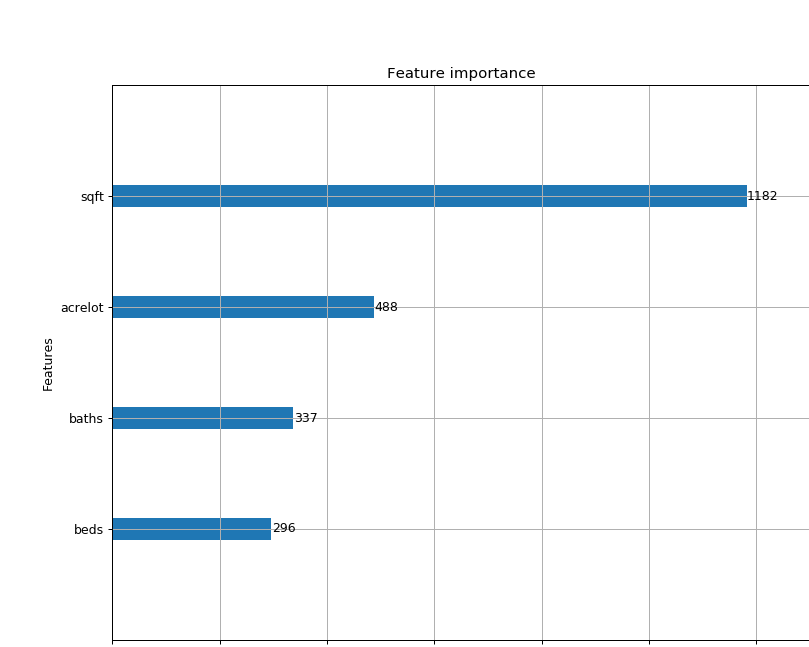

In [54]:
plt.rcParams['figure.figsize'] = [10, 8]
xgb.plot_importance(model_xgb,max_num_features=10)

In [55]:
train_data = lgb.Dataset(X_train_lab, label=y_train, free_raw_data = False)
validation_data = lgb.Dataset(X_test_lab, label=y_test, free_raw_data = False)

In [56]:
params_lgb ={'objective':'regression',
            'learning_rate' : 0.3,
            'metric':'Mean_squared_error'}

In [59]:
%time model_lgb = lgb.train(params_lgb, train_set=train_data, num_boost_round=10000,valid_sets=validation_data,early_stopping_rounds=500,verbose_eval=100)

Training until validation scores don't improve for 500 rounds
[100]	valid_0's l2: 1.13566e+11
[200]	valid_0's l2: 6.50295e+10
[300]	valid_0's l2: 3.38716e+10
[400]	valid_0's l2: 2.4146e+10
[500]	valid_0's l2: 1.95908e+10
Early stopping, best iteration is:
[1]	valid_0's l2: 1.50637e+10
Wall time: 418 ms


In [61]:
y_pred_lgb =model_lgb.predict(X_test_lab,num_iteration=model_lgb.best_iteration)
RMSE = sqrt(mean_squared_error(y_test, y_pred_lgb))
r2 = r2_score(y_test, y_pred_lgb)
print('RMSE=',RMSE)
print('R Squared=',r2)

RMSE= 122734.39441453111
R Squared= -0.5198912177764059


In [62]:
from catboost import CatBoost,Pool
train_pool = Pool(X_train_lab,y_train)

valid_pool = Pool(X_test_lab,y_test)

In [63]:
params_cgb ={'objective':'RMSE',
            'learning_rate': 0.02,
            'iterations':2000}

In [73]:
model_cgb = CatBoost(params_cgb)

%time model_cgb.fit(train_pool,eval_set=valid_pool,early_stopping_rounds=500,verbose_eval=100)

0:	learn: 1158950.6631828	test: 120107.4411558	best: 120107.4411558 (0)	total: 1.11ms	remaining: 2.21s
100:	learn: 530461.5301523	test: 66784.2897668	best: 66784.2897668 (100)	total: 93.7ms	remaining: 1.76s
200:	learn: 258541.1837813	test: 60434.9590319	best: 60434.9590319 (200)	total: 208ms	remaining: 1.86s
300:	learn: 153037.7516222	test: 58851.0218996	best: 58800.8269518 (287)	total: 290ms	remaining: 1.64s
400:	learn: 118747.4574301	test: 56065.0859476	best: 56065.0859476 (400)	total: 374ms	remaining: 1.49s
500:	learn: 106404.3827571	test: 49347.8569909	best: 49347.8569909 (500)	total: 492ms	remaining: 1.47s
600:	learn: 101492.6639851	test: 46306.7552532	best: 46306.7552532 (600)	total: 599ms	remaining: 1.4s
700:	learn: 98673.1242737	test: 46144.9259744	best: 46006.5882367 (684)	total: 703ms	remaining: 1.3s
800:	learn: 97253.1919703	test: 46129.9359829	best: 45948.3954461 (752)	total: 800ms	remaining: 1.2s
900:	learn: 96223.3658700	test: 45612.7582855	best: 45609.5927715 (897)	total

In [71]:
y_pred_cgb = model_cgb.predict(valid_pool,prediction_type='RawFormulaVal')

In [72]:
RMSE = sqrt(mean_squared_error(y_test, y_pred_cgb))
r2 = r2_score(y_test, y_pred_cgb)
print('RMSE=',RMSE)
print('R Squared=',r2)

RMSE= 43995.37285981262
R Squared= 0.8047037326667844


In [30]:
label_encoder = LabelEncoder()
X_train_lab = X_train.copy()
X_test_lab = X_test.copy()

for col in ['city/area','sale_type','state/zipcode','street']:
    X_train_lab[col] = label_encoder.fit_transform(X_train_lab[col])
    label_dict = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    X_test_lab[col]=X_test_lab[col].apply(lambda x: label_dict.get(x, 99999))

TypeError: argument must be a string or number